In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [54]:
mean = np.array([[0, 1], [1, 0], [-1, 0], [0, -1]])
cov = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])*0.1
pi = [0.25, 0.25, 0.25, 0.25]

In [55]:
X_train = np.zeros((500, 2))
for i in range(0, len(X_train)):
    k = np.random.choice(range(4), p = pi)
    X_train[i, :] = np.random.multivariate_normal(mean[k], cov[k])

We used numpy's multivariate_normal function to sample. numpy.random.multivariate_normal uses a process called Cholesky decomposition. It decomposes the covariance matrix into the product of a lower triangular matrix and its transpose. Then, the function generates random samples from a standard normal distribution (mean = 0, variance = 1) and transforms them to match the specified mean and covariance using the decomposition. Thus, the generated samples have the desired mean vector and covariance vector.

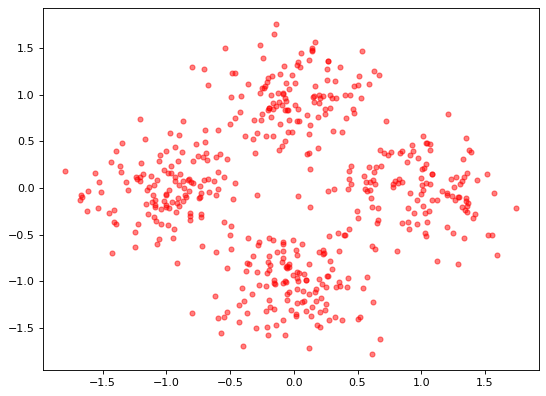

In [56]:
plt.figure(figsize = (8, 6), dpi = 80)
plt.scatter(X_train[:,0], X_train[:,1], marker = 'o', color = 'red', s = 20, alpha = 0.5)
plt.show()

In [57]:
class KMeans:
    
    def __init__(self, n_clusters, max_iter = 100, tolerance = 0.001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tolerance = tolerance
    
    def assign_clusters(self, X, centroids):
        distances = np.zeros((len(X), self.n_clusters))
        for t in range(len(X)):
            for p in range(self.n_clusters):
                distances[t][p] = np.sqrt((X[t][0] - self.centroids[p][0])**2 + (X[t][1] - self.centroids[p][1])**2)
        return np.argmin(distances, axis = 1)
        
    
    def update_centroids(self, X, clusters, n_clusters):
        centroids = np.zeros((n_clusters, X.shape[1]))
        for i in range(n_clusters):
            centroids[i] = np.mean(X[clusters == i], axis = 0)
        return centroids

    def total_distance(self, X, clusters, centroids):
        distances = np.zeros((len(X), self.n_clusters))
        for t in range(len(X)):
            for p in range(self.n_clusters):
                distances[t][p] = np.sqrt((X_train[t][0] - self.centroids[p][0])**2 + (X_train[t][1] - self.centroids[p][1])**2)
        return np.sum(distances)
    
    
    def fit(self, X):

        i = 0 
        self.centroids = np.zeros((self.n_clusters, 2))
        while i != 4:
            self.centroids[i] = random.choice(X_train)
            i += 1
        
        for i in range(self.max_iter):
            clusters = self.assign_clusters(X, self.centroids)
            distance = self.total_distance(X, clusters, self.centroids)
            self.centroids = self.update_centroids(X, clusters, self.n_clusters)
            new_distance = self.total_distance(X, clusters, self.centroids)
            if np.abs(distance - new_distance) < self.tolerance:
                break
                              
        colors = ['salmon', 'blue', 'teal', 'magenta']
        plt.figure(figsize = (8, 6), dpi = 80)
        for i in range(self.n_clusters):
            plt.scatter(X[clusters == i, 0], X[clusters == i, 1], c = colors[i], s = 20, alpha = 0.5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker = 'o', s = 30, color = 'red')
        plt.title("K-means clustering (number of clusters = {})".format(self.n_clusters))
        plt.show()

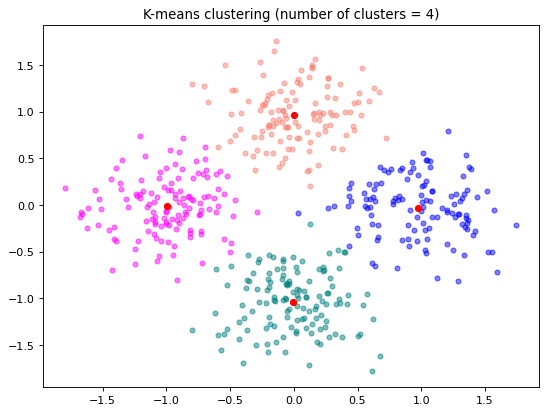

In [64]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_train)

We see that k-means can accurately cluster the different components of the mixture.